In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import cv2

In [30]:
#cargar los datos pca_50
datos = np.load('datos_pca_50.npz')
datos.files

['arr_0', 'arr_1']

In [31]:
datos.allow_pickle = True

In [32]:
x= datos['arr_0'] #con 50 componentes

In [33]:
y = datos['arr_1'] # variable indep

In [34]:
x

array([[ 0.88806669,  0.29448471,  0.28480911, ..., -0.78380617,
         0.01715913,  0.22137783],
       [ 1.17785295, -0.21138762,  0.33890305, ...,  0.47182827,
        -0.15666617, -1.63697566],
       [-0.76240637, -0.30511536,  0.39076673, ...,  0.86917022,
        -0.4683153 , -0.88850979],
       ...,
       [ 1.33939817,  0.60498636, -1.26395628, ..., -1.33431516,
         0.30075703, -1.80958864],
       [-1.25315424, -0.45646272, -0.57664332, ..., -0.05783125,
        -0.09654754,  0.28428154],
       [ 1.25781761,  0.97039796,  0.08263914, ...,  0.29201036,
         0.16245408,  0.47846427]])

In [35]:
y

array(['mujer', 'mujer', 'mujer', ..., 'hombre', 'hombre', 'hombre'],
      dtype=object)

In [36]:
#dividir la data en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3474, 50) (869, 50) (3474,) (869,)


In [40]:
#entrenar el modelo  
model_svc = SVC(probability=True)
param_grid = {'C':[0.5,1,10,20,30,50], 
           'kernel':['rbf','poly'],
           'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
           'coef0':[0,1]
          }

In [41]:
modelo_grid = GridSearchCV (model_svc, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

In [42]:
modelo_grid.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.1s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.0s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.5s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.2s
[CV] END ............C=0.5, coef0=0, gamma=0.0

[CV] END .............C=1, coef0=0, gamma=0.002, kernel=poly; total time=   1.1s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.4s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.4s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.6s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   1.3s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   1.1s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   1.0s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ...............C=1,

[CV] END ............C=10, coef0=1, gamma=0.001, kernel=poly; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   2.2s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   1.1s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   1.1s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   1.9s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.5s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   1.1s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   1.2s
[CV] END ............C=10, c

[CV] END .............C=30, coef0=0, gamma=0.01, kernel=poly; total time=   1.2s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.6s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.5s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.5s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.1s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END ............C=30, c

[CV] END .............C=50, coef0=1, gamma=0.05, kernel=poly; total time=   1.1s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   1.1s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ............C=50, c

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [43]:
#mejor estimador
modelo_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [44]:
modelo_final= modelo_grid.best_estimator_

In [45]:
modelo_final.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
#evaluamos el modelo -- hay 3 tipos de metricas 1. classification report, 2.kappa score 3.AUC
#1.- precision, recall, f1-score
#2.- -ve(worst model); 0 a 0.5 -> bad model; 0.5 a 0.7 buen modelo; 0.7 a 0.9 excelente; 0.9 a 1 perfecto
#3.- <0.5-> worst; 0.5-0.6-> bad; 0.6-0.8 good; 0.8-0.9 excelente; 0.9-1 perfecto
#ahora haremos la prediccion con la parte x_test, y_test
y_pred= modelo_final.predict(x_test)
y_pred


array(['mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'hombre', 'mujer',
       'mujer', 'mujer', 'mujer', 'mujer', 'hombre', 'hombre', 'mujer',
       'hombre', 'hombre', 'hombre', 'mujer', 'hombre', 'mujer', 'mujer',
       'hombre', 'hombre', 'hombre', 'hombre', 'hombre', 'hombre',
       'hombre', 'mujer', 'mujer', 'hombre', 'mujer', 'hombre', 'mujer',
       'mujer', 'mujer', 'hombre', 'hombre', 'hombre', 'mujer', 'mujer',
       'hombre', 'mujer', 'mujer', 'hombre', 'hombre', 'mujer', 'hombre',
       'mujer', 'mujer', 'mujer', 'hombre', 'mujer', 'hombre', 'hombre',
       'mujer', 'hombre', 'mujer', 'hombre', 'hombre', 'hombre', 'mujer',
       'mujer', 'hombre', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer',
       'mujer', 'mujer', 'hombre', 'mujer', 'mujer', 'mujer', 'hombre',
       'mujer', 'hombre', 'mujer', 'mujer', 'mujer', 'hombre', 'hombre',
       'mujer', 'mujer', 'mujer', 'mujer', 'hombre', 'hombre', 'hombre',
       'hombre', 'hombre', 'hombre', 'hombre', 'mujer', 'hom

In [47]:
#veremos con sklearn metrics Classification Report
cr = metrics.classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr).T


,precision,recall,f1-score,support
hombre,0.785326,0.739130,0.761528,391.000000
mujer,0.796407,0.834728,0.815117,478.000000
accuracy,0.791715,0.791715,0.791715,0.791715
macro avg,0.790867,0.786929,0.788323,869.000000
weighted avg,0.791421,0.791715,0.791005,869.000000


In [ ]:
#con estos datos vemos que la precision es mejor en el caso de las mujeres que en los hombres, lo mismo evidencia el f1-score (buscar que es eso!!!)

In [48]:
#ahora probaremos con Kappa Score
metrics.cohen_kappa_score(y_test, y_pred)

0.5769469734665609

In [ ]:
#de acuerdo a las metricas, el modelo cae en la categoria de "buen modelo"

In [49]:
#Ahora probamos con AUC - Area Under Curve //trabaja con numeros ==> ejecutando asi tendremos error (mostrarlo!)
#metrics.roc_auc_score(y_test, y_pred)
metrics.roc_auc_score(np.where(y_test=='hombre',1,0),
                      np.where(y_pred=='hombre',1,0))

0.786929234127706

In [ ]:
#con este ultimo, obtenemos un buen resultado -> good model

In [55]:
import cv2
import pickle
#en modelo_final tenemos nuestro machine learning
#necesitamos importar el xml que nos permite identificar caras
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#y tb importar nuestro diccionario
pca_model = pickle.load(open('pca_dict.pickle',mode='rb'))

In [57]:
modelo_pca = pca_model['pca'] #mi pca model
prom_caras = pca_model['promedio'] #es mi mean_face

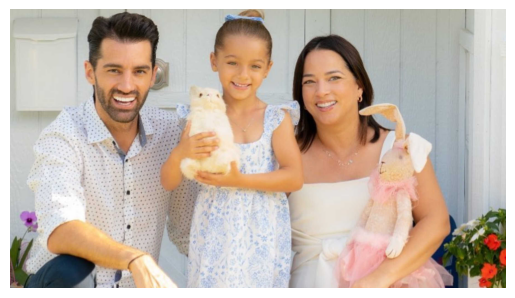

In [99]:
#una vez entrenado nuestro modelo --> vamos a probar con una imagen de prueba, para ellos seguiremos los sgtes pasos
#1, leer la imagen
import matplotlib.pyplot as plt
mi_img_test = cv2.imread('imagen_prueba2.jpg')
mi_img_test_rgb = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show()


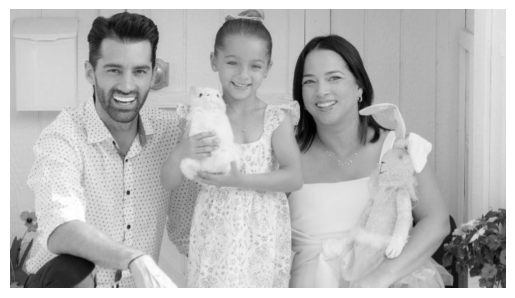

In [98]:
#2, convertir en escala de gris
gris = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2GRAY)

mi_img_test_rgb = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show()
#3. recortar la cara usando haar cascade classifier


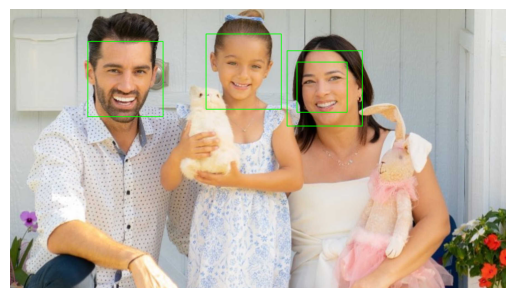

In [100]:
caras = haar.detectMultiScale(gris,1.5,3)
for x,y,w,h in caras:
    cv2.rectangle(mi_img_test,(x,y), (x+w, y+h),(0,255,0),2)
    
mi_img_test_rgb = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show() 

In [ ]:
roi = gris[y:y+h,x:x+w]
    plt.imshow(roi, cmap='gray')
    plt.show()


#4.- normalizacion
#5.- cambiar de tamano (100x100)
#6.- manejo de alargue o achatamiento de la imagen (1x10000)
#7.- subtraccion respecto del promedio
#8.- obtener eigen image
#9.- eigen imagen para visualizacion
#10.- pasar a machine leari¡nig y obtener predicciones
#11.- generar reporte